## 3.2 k-NN

### k-NN(k-Nearest Neighbors)
* k-최근접 이웃 분류 알고리즘, 지도학습
* 가장 간단한 머신러닝 알고리즘
* 기하학적 거리 분류기
* 기존에 2부류로 나뉜 점들에 새로운 점이 들어 오면 어느것으로 분류하는가?
* 가장 가깝게 위치하는 멤버로 분류하는 방식
* 멀리있는 멤버와 가까이 있는 멤버간에 가중치를 줄 수 있다.
* sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    * n_neighbors : k 이웃 값
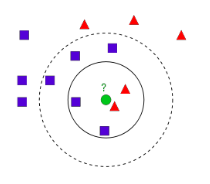

#### 난수 분류 예제

In [2]:
%matplotlib inline

4.0.0
prediction: [0]


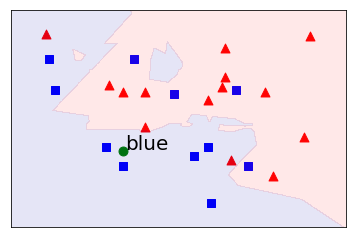

In [5]:
import cv2,  numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn
print(cv2.__version__)
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# 0~1 사이의 랜덤 수 25x1개 레이블 생성 ---②
labels = np.random.randint(0,2,(25,))
# 레이블 값 0과 같은 자리는 red, 1과 같은 자리는 blue로 분류해서 표시
blue = trainData[labels.ravel()==0]
red = trainData[labels.ravel()==1]

plt.scatter(red[:,0], red[:,1], 80, 'r', '^') # 빨강색 삼각형
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')# 파랑색 사각형

# 0 ~ 99 사이의 랜덤 수 신규 데이타 생성 ---③
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o') # 초록색 원

# KNearest 알고리즘 객체 생성 ---④
knn = KNeighborsClassifier(n_neighbors=3)
# train, 행 단위 샘플 ---⑤
knn.fit(trainData, labels)
# 예측 ---⑥

pred = knn.predict(newcomer)
mglearn.plots.plot_2d_separator(knn, trainData, fill=True, alpha=0.1)

# 결과 출력
print("prediction:", pred)
plt.annotate('red' if pred==1 else 'blue', xy=newcomer[0], \
             xytext=(newcomer[0]+1), fontsize=20)
plt.show()

#### 영화장르 분류 예제
* 키스 횟수 > 발차기  ? 로맨스 : 액션

predict: [0.]


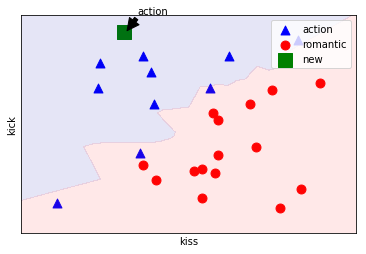

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn

# 0~99 사이의 랜덤 값 25x2 ---①
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# trainDatat[0]:kick, trainData[1]:kiss, kick > kiss ? 1 : 0 ---②
responses = (trainData[:, 0] >trainData[:,1]).astype(np.float32)
# 0: action : 1romantic ---③
action = trainData[responses==0]
romantic = trainData[responses==1]
# action은 파랑 삼각형, romantic은 빨강색 동그라미로 표시 ---④
plt.scatter(action[:,0],action[:,1], 80, 'b', '^', label='action')
plt.scatter(romantic[:,0],romantic[:,1], 80, 'r', 'o',label="romantic")

# 새로운 데이타 생성, 0~99 랜덤 수 1X2, 초록색 사각형으로 표시 ---⑤
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],200,'g','s', label="new")

# Knearest 알고리즘 생성 및 훈련 --- ⑥
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainData, responses)
# 결과 예측 ---⑦

pred = knn.predict(newcomer)
print("predict:", pred)
mglearn.plots.plot_2d_separator(knn, trainData, fill=True, alpha=0.1)


# 새로운 결과에 화살표로 표시 ---⑧
anno_x, anno_y = newcomer.ravel()
label = "action" if pred == 0 else "romantic" 
plt.annotate(label, xy=(anno_x + 1, anno_y+1), \
            xytext=(anno_x+5, anno_y+10), arrowprops={'color':'black'})
plt.xlabel('kiss');plt.ylabel('kick')
plt.legend(loc="upper right")
plt.show()

#### 손글씨 숫자 분류 예제
* `load_digits()`

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797,)
(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]
first digits : 0


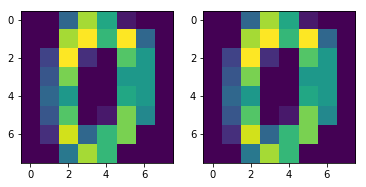

In [8]:
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

digits = load_digits()  #Mnist로 도 해보자

print(digits.keys()) # data, target, target_names, images ...
print(digits.data.shape) # 1D each sample, 64
print(digits.target.shape) 
print(digits.images.shape) # 2D each sample, 8x8
print(digits.target_names) # all classes


print("first digits :", digits.target[0])
plt.subplot(121)
plt.imshow(digits.images[0])
plt.subplot(122)
plt.imshow(digits.data[0].reshape((8,8)))
plt.show()

#### 손글씨  숫자 분류 예제
* 첫 번째 숫자만 표시

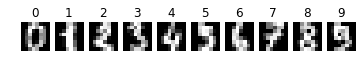

In [9]:
for i in digits.target_names:
    dimg = digits.images[digits.target==i][0]
    plt.subplot(1,10,i+1)
    plt.imshow(dimg, cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()


#### 손글씨 숫자 분류 예제
* 훈련 세트와 테스트 세트 분류
* 예측

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

for k in range(1, 11):
    # 결과 예측 ---④
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    score = knn.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%"%(k, score*100))

k=1, accuracy=98.89%
k=2, accuracy=98.06%
k=3, accuracy=98.33%
k=4, accuracy=97.50%
k=5, accuracy=97.50%
k=6, accuracy=97.22%
k=7, accuracy=97.50%
k=8, accuracy=97.50%
k=9, accuracy=97.50%
k=10, accuracy=97.22%


#### 손글씨 숫자 분류 예제
* 손으로 쓴 숫자 인식하기

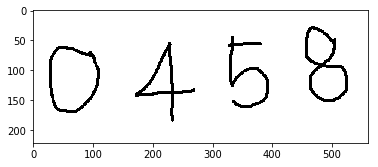

In [11]:
# 인식시킬 손글씨 이미지 읽기 ---③
#file_name = "./img/4027.png"
file_name = "./img/0458.png"
image = cv2.imread(file_name)
plt.imshow(image)

#### 손글씨 숫자 분류 예제
* 숫자 별 분리

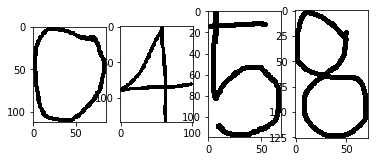

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hirachy = cv2.findContours(th, cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_SIMPLE)
numbers = []
for c in contours:
    # 컨투어를 감싸는 외접 사각형으로 숫자 영역 좌표 구하기 ---⑦
    (x, y, w, h) = cv2.boundingRect(c)    
    # 외접 사각형의 크기가 너무 작은것은 제외 ---⑧
    if w >= 5 and h >= 25:
        # 숫자 영역만 roi로 확보하고 사각형 그리기 ---⑨
        roi = gray[y:y + h, x:x + w]
        numbers.append(roi)
for i, n in enumerate(numbers):
    plt.subplot(1,len(numbers), i+1)
    plt.imshow(n, cmap="gray")

#### 손글씨 숫자 분류 예제
* 훈련 세트와 같은 크기로 축소

In [13]:
def digit2data(src, reshape=True):
    h, w = src.shape[:2]
    square = src
    # 정사각형 형태로 만들기
    if h > w:
        pad = (h - w)//2
        square = np.zeros((h, h), dtype=np.uint8)
        square[:, pad:pad+w] = src
    elif w > h :
        pad = (w - h)//2
        square = np.zeros((w, w), dtype=np.uint8)
        square[pad:pad+h, :] = src
    # 0으로 채워진 8x8 이미지 생성
    px = np.zeros((8,8), np.uint8)
    # 원본을 8x8으로 축소
    px[:, :] = cv2.resize(square, (8,8), interpolation=cv2.INTER_AREA)
    if reshape:
        # 1x64형태로 변환
        px = px.reshape((1,8*8))
    return px    

#### 손글씨 숫자 분류 예제
* 숫자 인식

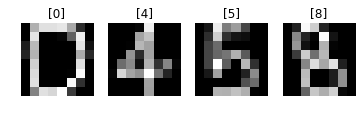

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(digits.data, digits.target)

for i, n in enumerate(numbers):
    n = 255- n  # 반전
    data = digit2data(n)
    pred = knn.predict(data)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(digit2data(n, False), cmap="gray")
    plt.axis("off")